<a href="https://colab.research.google.com/github/JD39/Processing-of-precipitation-data-over-Rio-Negro-basin/blob/main/Final_Project_CAP_394.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMERG precipitation and gauge stations data processing over Rio Negro basin: identifying extreme rain events 2015-2020 period


CAP-394 - Introduction to Data Science - Final Project

Johan Duque

Ph.D Student. Applied Computing. National Institute for Space Research (INPE), Brasil.


**Introduction**

This Notebook presents the study of rainfall over Rio Negro basin Uruguay-Brasil for the period from 2015 to 2020 on a daily and monthly scale. The purpose is to identify extreme precipitation events on the IMERG V.06 satellite database of NASA and the database of hydrometric stations of the National Administration of Power Plants and Electric Transmission (UTE) and the National Institute of Meteorology (INUMET).

**Observations before reading the notebook:** Sections 1, 2 and 3 do not need to be compiled since it was the process carried out to obtain the data and unify them both from the meteorological stations and for the satellite.

Datasets are available in the following folder: https://drive.google.com/drive/folders/1PsyqLIDoVwKZnNNlpBhRlLnB2BvTV1w1?usp=sharing

**Data sets**



**Hydrometric stations-UTE**

To acquire the UTE data, the crawler and scrapping method was used, a Github repository is attached with the method to download databases.

https://portal.ute.com.uy/precipitaciones-ocurridas-y-prevision-de-niveles

https://github.com/ml-as-a-service/ds-tesis-ute


https://www.youtube.com/watch?v=Az1cSNLNy0Q&ab_channel=MarioGarcia


**Satellite data - IMERG**

To acquire the data from NASA's Earth Data satellite platform, the GNU wget tool was used.


IMERG V.06 Mission: https://gpm.nasa.gov/data/imerg

Data: https://disc.sci.gsfc.nasa.gov/datasets?keywords=imerg&page=1

wget: http://gnuwin32.sourceforge.net/packages/wget.htm



***The following two sections show process carried out to acquire the study dataset***


# 1. Hydrometric stations 

Here the processing carried out on the data downloaded through the scrapping method is presented.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd'/content/drive/MyDrive/PhD/Datos_Precipi/Data_drecip_pluv_15_20'

/content/drive/MyDrive/PhD/Datos_Precipi/Data_drecip_pluv_15_20


In [ ]:
!pwd # data path

/content/drive/My Drive/PhD/Datos_Precipi/Data_drecip_pluv_15_20


In [ ]:
# Librarys
import glob
import pandas as pd


In [ ]:
# Data directory
listFiles = glob.glob('*.csv')
listFiles.sort()

In [ ]:
#data frame with all csv files (2.022)
df = [pd.read_csv(archivo) for archivo in listFiles]

In [ ]:
dfTotales = df[0]

In [ ]:
#Concat files
for i in range(1,len(df)):
  dfTotales = pd.concat([dfTotales, df[i]], join = 'outer', ignore_index=True)

In [ ]:
#Export concat df data to csv
dfTotales.to_csv('Totales2015_2020.csv')

In [ ]:
#visualize dataframe with all concatenated stations
#dfTotales


In [ ]:
#percentage of outliers data
dfTotales['precipitacion'].isnull().sum()/dfTotales.shape[0]* 100 

3.219649467780932

In [ ]:
#number of data
dfTotales.shape[0]

398708

Here I have a doubt regarding the filling of the missing data since according to the literature the recommended method is kriging, but when applying I obtain negative precipitation data for the filled data.

# 2. Satellite data 

Here is presented the methodology to form the data set of the precipitation data obtained by satellite

In [ ]:
#Library
import xarray as xr
import os

In [ ]:
cd'/content/drive/MyDrive/PhD/Datos_Precipi/imerg_rio_negro'

/content/drive/MyDrive/PhD/Datos_Precipi/imerg_rio_negro


Reading the daily precipitation data (2.192) files, in .netcdf4 format, using the xarray library, store in a dataframe and save in csv.

In [ ]:
os.chdir('/content/drive/MyDrive/PhD/Datos_Precipi')
preci_list = []
for file in os.listdir('imerg_rio_negro'):
    if file.startswith('3B-DAY.MS.MRG.3IMERG.'):
        #ds = xr.open_mfdataset('IMERG_Day/{}'.format(file), decode_times=True, join='outer')  
        ds = xr.open_dataset('imerg_rio_negro/{}'.format(file) , decode_times=True) #,combine = 'by_coords')
        v = ds.to_dataframe()
        preci_list.append(v)
        ds.close()       
df = pd.concat(preci_list) 
preci_day=df['precipitationCal']
preci_day.to_csv('precip_imerg_day_rio_negro.csv')

# 3. Loading the CSV files with  all data for visualization and processing 

In this section we load the datasets generated previously for the precipitation data from pluviometric stations and satellite measurements of the global precipitation model GPM.

**Goals** 


*  Plot the time series of precipitation data over the region of study (Rionegro-Uruguay) for pluviometric station and IMERG
* perform an exploratory data analysis (EDA)

 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cd'/content/drive/MyDrive/PhD/Datos_Precipi'

/content/drive/MyDrive/PhD/Datos_Precipi


# Pluviometric station 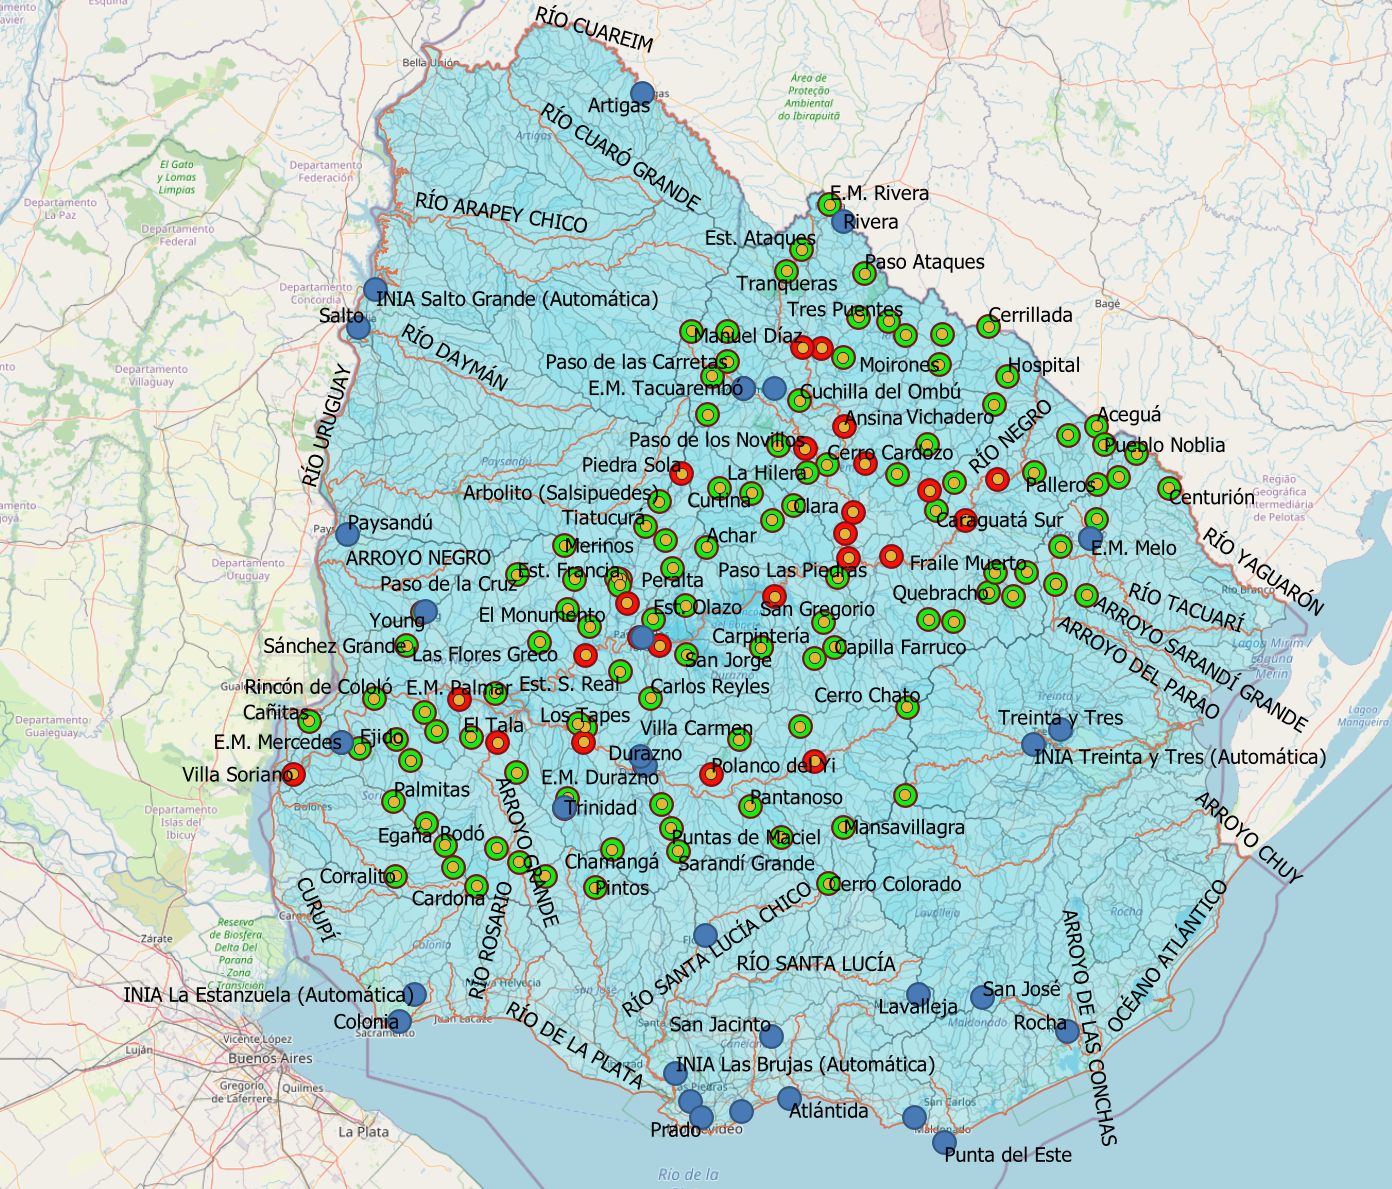

In [ ]:
# data set joined by station is loaded for all rain gauges 
dfPluviometrosUy = pd.read_csv('Totales2015_2020.csv')

In [ ]:
#data of the rain gauges stations with lat and lot
precipitation_pluv=dfPluviometrosUy.loc[:, ['estacion','lat', 'lon', 'dt', 'precipitacion']]

In [ ]:
#precipitation_pluv.dtypes

In [ ]:
#Asignar columna tipo datatime
precipitation_pluv['dt'] = pd.to_datetime(precipitation_pluv['dt']) 

In [ ]:
precipitation_pluv.dtypes

estacion                 object
lat                     float64
lon                     float64
dt               datetime64[ns]
precipitacion           float64
dtype: object

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 12837 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


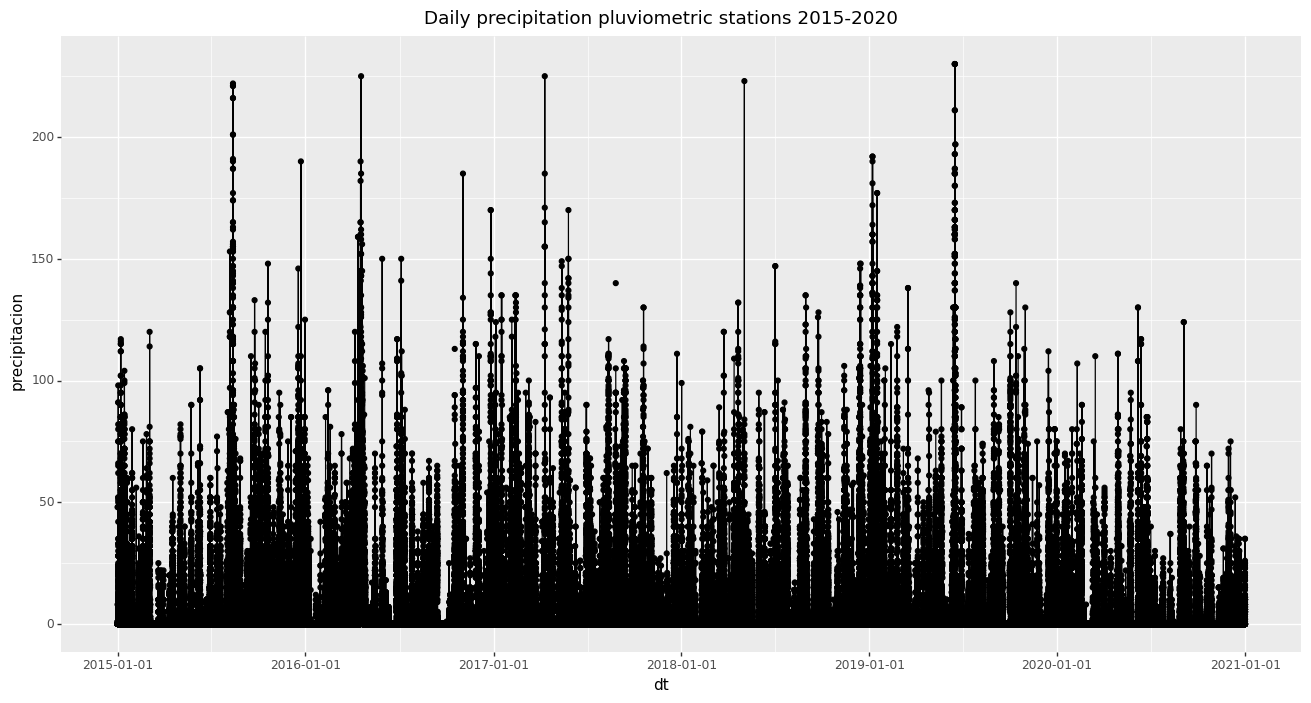

<ggplot: (8769473322553)>

In [ ]:
#visualization of the time series of precipitation of pluviometric station 2015-2020
from plotnine import *

(
   ggplot(precipitation_pluv, aes(x = 'dt', y = 'precipitacion' )) #, color = 'factor(precipitation)')  )
    + geom_point() + geom_line()
    + ggtitle("Daily precipitation pluviometric stations 2015-2020")
    + theme(figure_size=(16, 8)) 
)

Plot station by station or all stations

In [ ]:
#precipitation data station gruped by station and time
#precipitacion_agrupada=precipitation_pluv.groupby(['estacion', "dt"]).sum()

In [ ]:
#precipitation data station by station
#precipitacion_agrupada.loc['Villa Soriano'].precipitacion.plot()

In [ ]:
#Plot all stations
#precipitacion_agrupada.reset_index(inplace = True)

In [ ]:
#from plotnine import *
#(
#    ggplot(precipitacion_agrupada, aes(x = "dt", y = "precipitacion", color = "factor(estacion)"))
#        + geom_line()
#        + facet_wrap("~estacion")  # separando os dados por estacion.
#        + ggtitle("Serie de tiempo de todas las estaciones ")
#        + xlab("Año")
#        + ylab("Precipitación")
#        + theme(axis_text_x = element_text(angle = 45), figure_size=(50, 20)) 
#)

# IMERG data set 


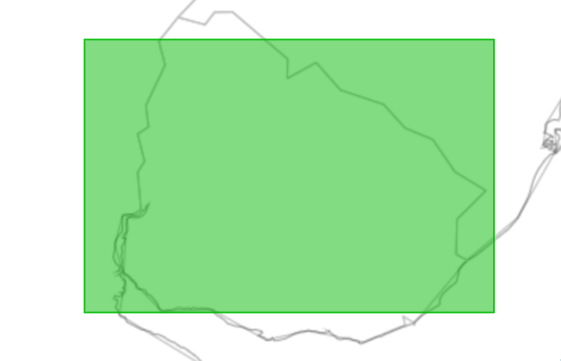

In [ ]:
#Readind imerg dataset
data_imerg = pd.read_csv('precip_imerg_day_rio_negro.csv',sep=",")  

In [ ]:
precipitation_imerg_day=data_imerg.loc[:, ['lat', 'lon', 'time', 'precipitationCal']]

In [ ]:
# Time column to datatime type
precipitation_imerg_day['time'] = pd.to_datetime(precipitation_imerg_day['time']) 
precipitation_imerg_day.set_index('time',inplace = True)

In [ ]:
#precipitation_imerg_day

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


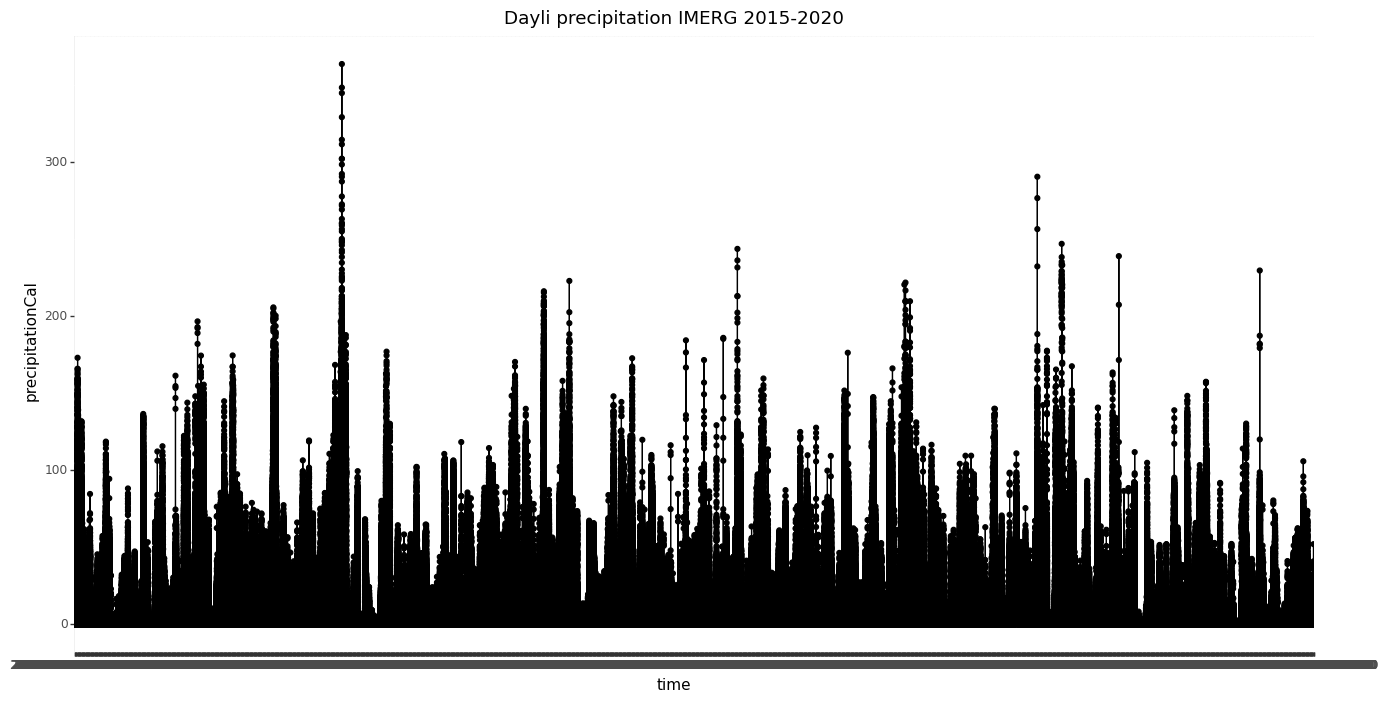

<ggplot: (8769432227697)>

In [ ]:
#visualization of the time series of precipitation imerg 2015-2020
from plotnine import *
(
   ggplot(precipitation_imerg_day, aes(x = 'time', y = 'precipitationCal' )) #, color = 'factor(precipitation)')  )
  + geom_point() + geom_line()
  + ggtitle("Dayli precipitation IMERG 2015-2020")
  + theme(figure_size=(16, 8)) 
)

In [ ]:
#Plot imerg data between 2015-2020
#precipitation_imerg_day.loc['2015-01-01': '2020-12-31','precipitationCal'].plot(color="black", marker = 'o', figsize=(20, 9)) 
#plt.ylabel('Precipitation(mm/hr)')
#plt.title('Precipitation day IMERG 2015-2020')

# 4. Analysis of the rainiest periods

The objective of this section is to apply data exploratory methods to compare periods of extreme rains over Rio Negro basin Uruguay-Brasil and thus validate the detection capacity of the IMERG satellite mission  using data from rainfall stations.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cd'/content/drive/MyDrive/PhD/Final_project_CAP_394'

/content/drive/MyDrive/PhD/WORCAP


Reading CSV files

In [ ]:
dfPluviometros = pd.read_csv('Precip_pluv_day_rio_negro.csv')
precipitation_pluv=dfPluviometros.loc[:, ['estacion','lat', 'lon', 'dt', 'precipitacion']]

In [ ]:
dfImerg = pd.read_csv('precip_imerg_day_rio_negro.csv',sep=",") 
precipitation_imerg_day=dfImerg.loc[:, ['lat', 'lon', 'time', 'precipitationCal']] 

For the purposes of this work we only filter data where there was precipitation for IMERG and pluviometers (for data great than 5 mm/hr in pluviometers data is a rain day Racha=threshold https://www.baranidesign.com/faq-articles/2020/1/19/rain-gauge-accuracy-and-wmonws-standards)

In [ ]:
dias_lluviosos_pluv = precipitation_pluv.loc[precipitation_pluv["precipitacion"] >=5] 
dias_lluviosos_imerg = precipitation_imerg_day.loc[precipitation_imerg_day["precipitationCal"] >=5] 

In [ ]:
#For the first approximation, let us consider the maximum and min data reported by rainfall stations and by IMERG.
dias_lluviosos_pluv.precipitacion.describe()

count    52377.000000
mean        23.631460
std         21.681942
min          5.000000
25%          9.000000
50%         16.000000
75%         30.000000
max        230.000000
Name: precipitacion, dtype: float64

In [ ]:
#precipitation_imerg_day.reset_index(inplace = True)
dias_lluviosos_imerg.precipitationCal.describe()

count    825578.000000
mean         24.564422
std          21.874616
min           5.000001
25%           9.312396
50%          16.976079
75%          32.314174
max         363.519700
Name: precipitationCal, dtype: float64

In [ ]:
#precipitation_pluv_lluvias=precipitation_pluv['dt'].unique()
#precipitation_imerg_day_lluvias=precipitation_imerg_day['time'].unique()
#precipitation_imerg_day['precipitationCal'].unique()

Now we proceeded to calculate the mean daily precipitation for the entire study region and analyze the detection capacity of the IMERG against the pluviometric stations.

In [ ]:
# by date groups the average rainfall values for the entire region
#Group rainy days by weather to see rainy mean dates Pluv 
fechas_lluvia_pluv=precipitation_pluv.groupby("dt")
#fechas_lluvia_pluv=dias_lluviosos_pluv.groupby("dt")
fechas_lluvia_media_pluv=fechas_lluvia_pluv.mean() 

In [ ]:
#Group rainy days by weather to see rainy mean dates IMERG
fechas_lluvia_imerg=precipitation_imerg_day.groupby("time")
#fechas_lluvia_imerg=dias_lluviosos_imerg.groupby("time")
fechas_lluvia_media_imerg=fechas_lluvia_imerg.mean() 

In [ ]:
fechas_lluvia_media_pluv

lat        lon  precipitacion
dt                                                      
2015-01-01 07:00:00 -32.646266 -56.128823       0.704819
2015-01-02 07:00:00 -32.646266 -56.128823      16.603550
2015-01-03 07:00:00 -32.646266 -56.128823       0.000000
2015-01-04 07:00:00 -32.646266 -56.128823       0.000000
2015-01-05 07:00:00 -32.646266 -56.128823       0.000000
...                        ...        ...            ...
2020-12-27 07:00:00 -32.641099 -56.128649       0.000000
2020-12-28 07:00:00 -32.641099 -56.128649       0.000000
2020-12-29 07:00:00 -32.641099 -56.128649       0.000000
2020-12-30 07:00:00 -32.641099 -56.128649       0.059524
2020-12-31 07:00:00 -32.641099 -56.128649       8.166667

[2192 rows x 3 columns]

In [ ]:
fechas_lluvia_media_imerg

lat        lon  precipitationCal
time                                                   
2015-01-01 00:00:00 -32.55 -55.949999         22.302808
2015-01-02 00:00:00 -32.55 -55.949999          0.041001
2015-01-03 00:00:00 -32.55 -55.949999          0.008051
2015-01-04 00:00:00 -32.55 -55.949999          0.002775
2015-01-05 00:00:00 -32.55 -55.949999          0.001761
...                    ...        ...               ...
2020-12-27 00:00:00 -32.55 -55.949999          0.373667
2020-12-28 00:00:00 -32.55 -55.949999          0.010739
2020-12-29 00:00:00 -32.55 -55.949999          0.335372
2020-12-30 00:00:00 -32.55 -55.949999          8.793045
2020-12-31 00:00:00 -32.55 -55.949999          0.237605

[2191 rows x 3 columns]

Text(0.5, 1.0, 'Precipitation mean  day Pluv 2015-2020')

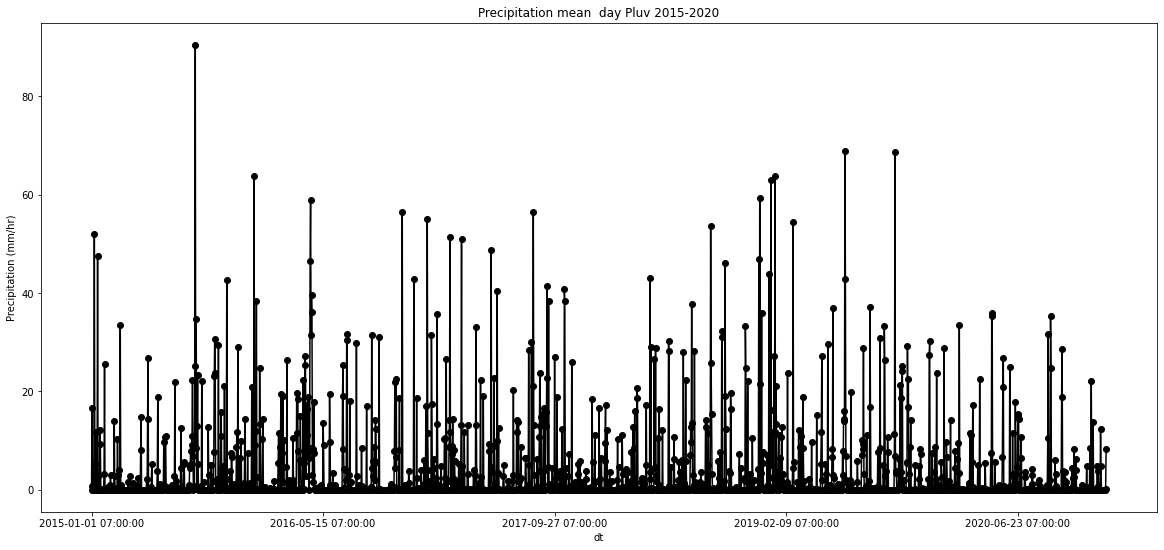

In [ ]:
#visualize time series 
fechas_lluvia_media_pluv.precipitacion.plot(color="black", marker = 'o', figsize=(20, 9)) 
plt.ylabel('Precipitation (mm/hr)')
plt.title('Precipitation mean  day Pluv 2015-2020')

Text(0.5, 1.0, 'Precipitation mean  day IMERG 2015-2020')

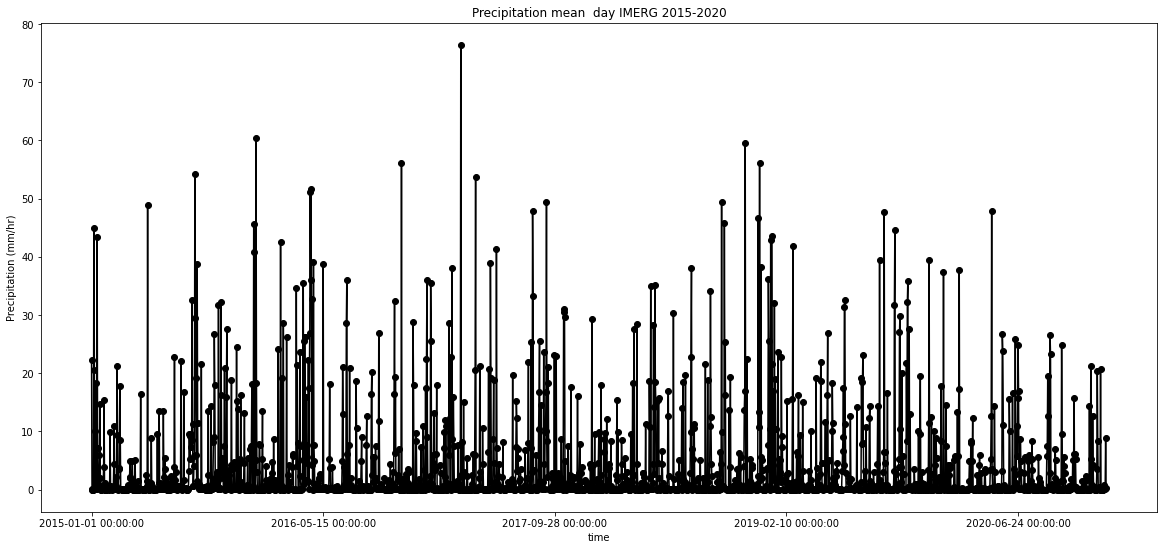

In [ ]:
#visualize time series 
fechas_lluvia_media_imerg.precipitationCal.plot(color="black", marker = 'o', figsize=(20, 9)) 
plt.ylabel('Precipitation (mm/hr)')
plt.title('Precipitation mean  day IMERG 2015-2020')

In [ ]:
fechas_lluvia_media_pluv.reset_index(inplace = True)

In [ ]:
fechas_lluvia_media_imerg.reset_index(inplace = True)

In [ ]:
#fechas_lluvia_media_pluv.dtypes

In [ ]:
#Visualize dataframe
#fechas_lluvia_media_imerg
#fechas_lluvia_media_pluv

In [ ]:
#concat dataframe using merge
precipitation_mean_day=fechas_lluvia_media_pluv.merge(fechas_lluvia_media_imerg, how='outer', left_index=True, right_index=True)

In [ ]:
#precipitation_mean_day=fechas_lluvia_media_pluv.loc[:, ['lat', 'lon', 'precipitacion']]

In [ ]:
#The lasta value correspond with the satellite data of 01/01/2021 at 00:00 and the pluv station is 31/12/2020 07:00
precipitation_mean_day.drop([2191])

dt      lat_x  ...      lon_y  precipitationCal
0     2015-01-01 07:00:00 -32.646266  ... -55.949999         22.302808
1     2015-01-02 07:00:00 -32.646266  ... -55.949999          0.041001
2     2015-01-03 07:00:00 -32.646266  ... -55.949999          0.008051
3     2015-01-04 07:00:00 -32.646266  ... -55.949999          0.002775
4     2015-01-05 07:00:00 -32.646266  ... -55.949999          0.001761
...                   ...        ...  ...        ...               ...
2186  2020-12-26 07:00:00 -32.641099  ... -55.949999          0.373667
2187  2020-12-27 07:00:00 -32.641099  ... -55.949999          0.010739
2188  2020-12-28 07:00:00 -32.641099  ... -55.949999          0.335372
2189  2020-12-29 07:00:00 -32.641099  ... -55.949999          8.793045
2190  2020-12-30 07:00:00 -32.641099  ... -55.949999          0.237605

[2191 rows x 8 columns]

In [ ]:
#Reneame columns and drop not neccesary columns
precipitation_mean_day.drop(columns=['lat_x','lat_y', 'lon_x','lon_y'])
precipitation_mean_day.loc[:, ['time' ,'precipitacion', 'precipitationCal']]
precipitation_mean_day['precipitation_pluv']=precipitation_mean_day['precipitacion']
precipitation_mean_day['precipitation_imerg']=precipitation_mean_day['precipitationCal']

In [ ]:
#Filter not necessary columns
precipitation_mean_rio_negro=precipitation_mean_day.drop(columns=['lat_x','lat_y', 'lon_x','lon_y','precipitationCal','precipitacion']).drop([2191])

In [ ]:
#View dataframe
precipitation_mean_rio_negro

dt  ... precipitation_imerg
0     2015-01-01 07:00:00  ...           22.302808
1     2015-01-02 07:00:00  ...            0.041001
2     2015-01-03 07:00:00  ...            0.008051
3     2015-01-04 07:00:00  ...            0.002775
4     2015-01-05 07:00:00  ...            0.001761
...                   ...  ...                 ...
2186  2020-12-26 07:00:00  ...            0.373667
2187  2020-12-27 07:00:00  ...            0.010739
2188  2020-12-28 07:00:00  ...            0.335372
2189  2020-12-29 07:00:00  ...            8.793045
2190  2020-12-30 07:00:00  ...            0.237605

[2191 rows x 4 columns]

In [ ]:
#save the data frame of mean daily precipitation for Rio Negro basin for gauge stations and imerg satellite mission 
#precipitation_mean_rio_negro.to_csv('precipitation_mean_rio_negro.csv')
precipitation_mean_rio_negro

dt  ... precipitation_imerg
0     2015-01-01 07:00:00  ...           22.302808
1     2015-01-02 07:00:00  ...            0.041001
2     2015-01-03 07:00:00  ...            0.008051
3     2015-01-04 07:00:00  ...            0.002775
4     2015-01-05 07:00:00  ...            0.001761
...                   ...  ...                 ...
2186  2020-12-26 07:00:00  ...            0.373667
2187  2020-12-27 07:00:00  ...            0.010739
2188  2020-12-28 07:00:00  ...            0.335372
2189  2020-12-29 07:00:00  ...            8.793045
2190  2020-12-30 07:00:00  ...            0.237605

[2191 rows x 4 columns]

In [ ]:
#statics of df where is posible where it is possible to observe the minimum, maximum and mean values of the data set 
precipitation_mean_rio_negro.describe()

precipitation_pluv  precipitation_imerg
count         2191.000000          2191.000000
mean             3.614126             3.959296
std              8.912054             8.669471
min              0.000000             0.000000
25%              0.000000             0.015406
50%              0.000000             0.207331
75%              1.970604             3.042704
max             90.518987            76.425169


Using plotly library plot the time series to see the exact date of the maximum event of precipitation for IMERG mission and gauge stations

In [ ]:
import plotly.express as px
fig = px.line(precipitation_mean_rio_negro, x="time", y=precipitation_mean_rio_negro['precipitation_imerg'],
             
              title='Mean daily precipitation IMERG')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(precipitation_mean_rio_negro, x="time", y=precipitation_mean_rio_negro['precipitation_pluv'],
             
              title='Mean daily precipitation Pluv')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

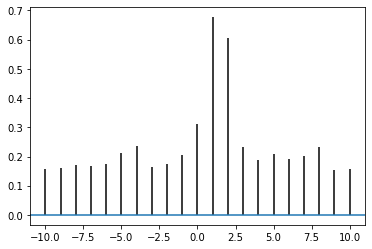

In [ ]:
#Plot correlation between Pluv and IMERG
C=plt.xcorr(x=precipitation_mean_rio_negro['precipitation_pluv'], y=precipitation_mean_rio_negro['precipitation_imerg'])

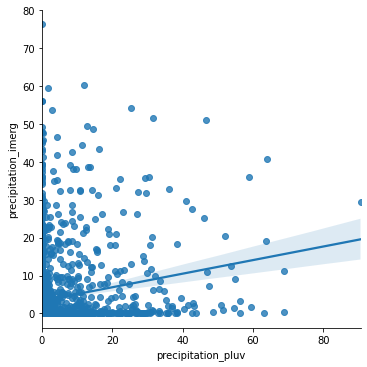

In [ ]:
import seaborn as sns
sns.lmplot(x='precipitation_pluv', y='precipitation_imerg', fit_reg=True, data=precipitation_mean_rio_negro);


<function matplotlib.pyplot.show>

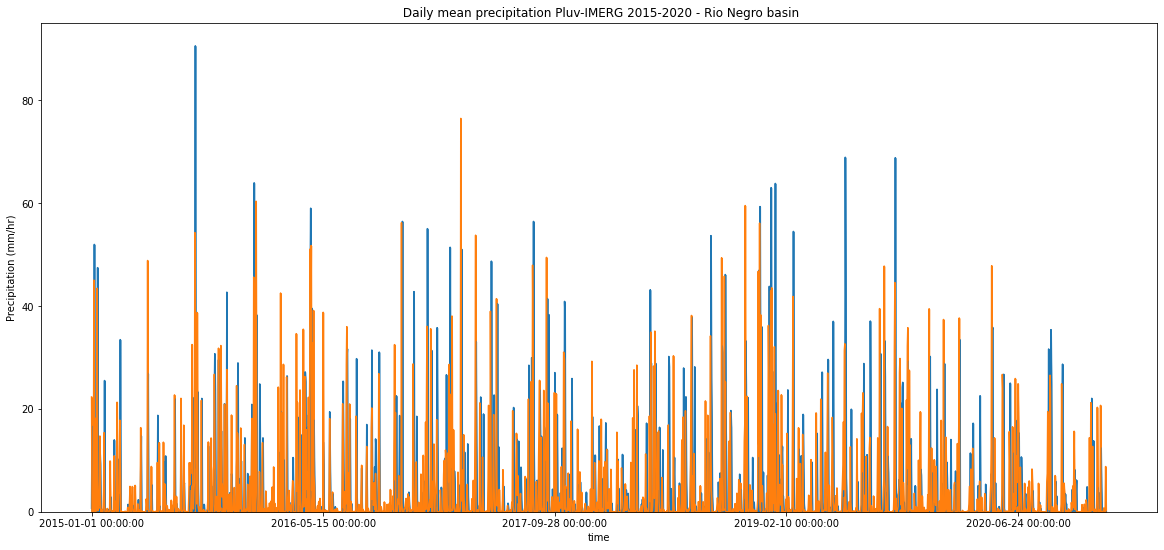

In [ ]:
plt.ylabel('Precipitation (mm/hr)')
plt.title(' Daily mean precipitation Pluv-IMERG 2015-2020 - Rio Negro basin')
precipitation_mean_rio_negro.set_index('time')['precipitation_pluv'].plot(kind='area', figsize=(20, 9));
precipitation_mean_rio_negro.set_index('time')['precipitation_imerg'].plot(kind='area', figsize=(20, 9));
plt.show

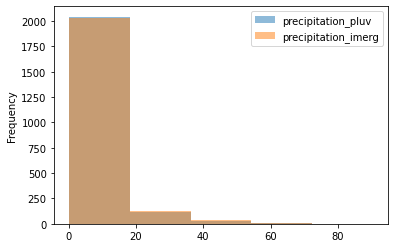

In [ ]:
#histograms of precipitation mean
precipitation_mean_rio_negro[['precipitation_pluv','precipitation_imerg']].plot.hist(bins=5,alpha=0.5)
plt.show()

The calculation of metrics for the comparison of both data is carried out, where an optimal resolution is observed for both the satellite and rainfall data for the average values over the Rio Negro region. 

In [ ]:
#precipitation_mean_rio_negro.reset_index(drop=True, inplace=True)
#precipitation_mean_rio_negro=precipitation_mean_rio_negro.drop(['index'], axis=1)
#import statsmodels.api as sm
# corr = precipitation_mean_rio_negro.set_index('time').corr()
# sm.graphics.plot_corr(corr, xnames=list(corr.columns))
# plt.show()

In [ ]:
#precipitation_mean_rio_negro

In [ ]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(precipitation_mean_rio_negro["precipitation_pluv"], precipitation_mean_rio_negro["precipitation_imerg"])
print('RMSE: ', round(np.sqrt(mse), 4))

mean_absolute_error= metrics.mean_absolute_error(precipitation_mean_rio_negro["precipitation_pluv"], precipitation_mean_rio_negro["precipitation_imerg"])
print('MAE: ', round(mean_absolute_error, 4))

RMSE:  11.2301
MAE:  5.5031


# 5. Maximum precipitation values: detection of monthly extreme events 

In [ ]:
#assign column datetime type
dias_lluviosos_imerg['time'] = pd.to_datetime(dias_lluviosos_imerg['time']) 
dias_lluviosos_pluv['dt'] = pd.to_datetime(dias_lluviosos_pluv['dt']) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#dias_lluviosos_pluv.dtypes

In [ ]:
#assign column time as indes
dias_lluviosos_max_pluv=dias_lluviosos_pluv.set_index('dt')
dias_lluviosos_max_imerg=dias_lluviosos_imerg.set_index('time')

In [ ]:
#Resampling data daily to monthly with the maximum values of precipitation to see only the extreme events
data_max_pluv = dias_lluviosos_max_pluv['precipitacion'].resample('M').max()
data_max_imerg = dias_lluviosos_max_imerg["precipitationCal"].resample('M').max()

In [ ]:
#Concat the dtaframe of pluviometric stations and imerg dataset
precipitation_max_month = pd.concat([data_max_pluv, data_max_imerg], axis=1)
precipitation_max_month['precipitation_pluv']=precipitation_max_month['precipitacion']
precipitation_max_month['precipitation_imerg']=precipitation_max_month['precipitationCal']
precipitation_max_month_rio_negro=precipitation_max_month.reset_index()

In [ ]:
#precipitation_max_month_rio_negro

In [ ]:
# dias_lluviosos_pluv['dt'] = pd.to_datetime(dias_lluviosos_pluv['dt']) 
# dias_lluviosos_pluv.set_index('dt',inplace = True)
# data_day_max_pluv = dias_lluviosos_pluv["precipitacion"].resample('M').max().plot(color="black", marker = 'o', figsize=(12, 7))
# dias_lluviosos_imerg['time'] = pd.to_datetime(dias_lluviosos_imerg['time']) 
# dias_lluviosos_imerg.set_index('time',inplace = True)
# data_day_max_imerg = dias_lluviosos_imerg["precipitationCal"].resample('M').max().plot(color="black", marker = 'o', figsize=(12, 7))

**Plot maximum value time series for gauge satiton and IMERG**

In [ ]:
import plotly.express as px
fig = px.line(precipitation_max_month_rio_negro, x="dt", y=precipitation_max_month_rio_negro['precipitation_imerg'],
             
              title='Max monthly precipitation IMERG')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(precipitation_max_month_rio_negro, x="dt", y=precipitation_max_month_rio_negro['precipitation_pluv'],
             
              title='Max monthly precipitation pluv')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

Fot the monthly precipitation pluviometric data is possible to view a pattern of extreme events each year except for 2020 the pattern is appear in Aug 2015 precipitation 222 mm/hr, Apr 2016 precipitation 225 mm/hr, Apr 2017 225 mm/hr, May 2018 precipitation 223 mm/hr, Jun 2019 precipitation 230 mm/hr. While for the IMERG satellite data it is not possible to detect any pattern in the time series.

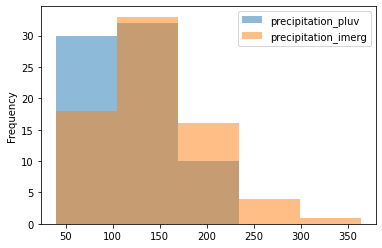

In [ ]:
#histogram of data set 
precipitation_max_month_rio_negro[['precipitation_pluv','precipitation_imerg']].plot.hist(bins=5,alpha=0.5)
plt.show()

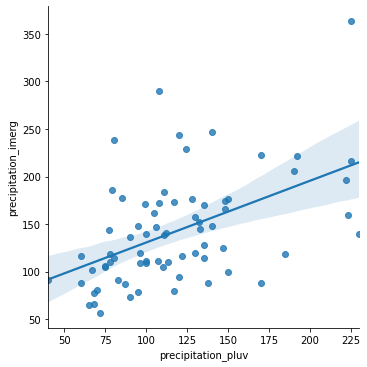

In [ ]:
#Correlation
import seaborn as sns
sns.lmplot(x='precipitation_pluv', y='precipitation_imerg', fit_reg=True, data=precipitation_max_month_rio_negro);


In [ ]:
# import statsmodels.api as sm
# corr = precipitation_max_month_rio_negro.set_index('dt').corr()
# sm.graphics.plot_corr(corr, xnames=list(corr.columns))
# plt.show()

In [ ]:
#precipitation_max_month_rio_negro.to_csv('precipitation_max_month_rio_negro.csv')

In [ ]:
precipitation_max_month_rio_negro = precipitation_max_month_rio_negro.drop(['precipitacion', 'precipitationCal'],axis=1)
precipitation_max_month_rio_negro.describe()

precipitation_pluv  precipitation_imerg
count           72.000000            72.000000
mean           117.638889           142.064731
std             43.655923            56.472308
min             40.000000            56.097584
25%             84.500000           105.043948
50%            110.500000           131.905310
75%            135.750000           172.600652
max            230.000000           363.519700

In [ ]:
precipitation_max_month_rio_negro

dt  precipitation_pluv  precipitation_imerg
0  2015-01-31               117.0           172.842220
1  2015-02-28                78.0           118.411930
2  2015-03-31               120.0            94.231520
3  2015-04-30                60.0            87.999800
4  2015-05-31                90.0           136.369720
..        ...                 ...                  ...
67 2020-08-31                80.0           113.880615
68 2020-09-30               124.0           229.474260
69 2020-10-31                70.0            80.217880
70 2020-11-30                72.0            56.097584
71 2020-12-31                75.0           105.651790

[72 rows x 3 columns]

In [ ]:
#PmaxPluv=precipitation_max_month_rio_negro.loc[precipitation_max_month_rio_negro["precipitation_pluv"] >= 150 ] 
#PmaxImerg=precipitation_max_month_rio_negro.loc[precipitation_max_month_rio_negro["precipitation_imerg"] >=200] 

In [ ]:
#Stablish the criterium for the maximum events of precipitation for values grater than 100 mm/hr
Precipitation_max_events=precipitation_max_month_rio_negro[ (precipitation_max_month_rio_negro["precipitation_pluv"] >= 100) & (precipitation_max_month_rio_negro["precipitation_imerg"] >=100) ]

In [ ]:
#Precipitation_max_events

In [ ]:
len(Precipitation_max_events)

40

Correlation between variables and value of errors RMSE, MAE. 

In [ ]:
print('Correlación Pearson: ', precipitation_max_month_rio_negro["precipitation_pluv"].corr(precipitation_max_month_rio_negro["precipitation_imerg"], method='pearson'))
print('Correlación spearman: ', precipitation_max_month_rio_negro["precipitation_pluv"].corr(precipitation_max_month_rio_negro["precipitation_imerg"], method='spearman'))
#print('Correlación kendall: ', precipitation_max_month_rio_negro["precipitation_pluv"].corr(precipitation_max_month_rio_negro["precipitation_imerg"], method='kendall'))

Correlación Pearson:  0.50173173031282
Correlación spearman:  0.5152533763275149


In [ ]:
#La librería Pingouin tiene una de las implementaciones más completas. Con la función corr() se obtiene, además del coeficiente de correlación, su significancia, intervalo de confianza y poder estadístico entre otros.
#!pip install pingouin
import pingouin as pg
# Cálculo de correlación lineal
# ==============================================================================
display(pg.corr(x=precipitation_max_month_rio_negro["precipitation_pluv"], y=precipitation_max_month_rio_negro["precipitation_imerg"], method='pearson'))
display(pg.corr(x=precipitation_max_month_rio_negro["precipitation_pluv"], y=precipitation_max_month_rio_negro["precipitation_imerg"],  method='spearman'))
#display(pg.corr(x=precipitation_max_month_rio_negro["precipitation_pluv"], y=precipitation_max_month_rio_negro["precipitation_imerg"],  method='kendall'))

n         r         CI95%     p-val      BF10    power
pearson  72  0.501732  [0.31, 0.66]  0.000007  2862.417  0.99597

n         r         CI95%     p-val    power
spearman  72  0.515253  [0.32, 0.67]  0.000004  0.99746

In [ ]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(precipitation_max_month_rio_negro["precipitation_pluv"], precipitation_max_month_rio_negro["precipitation_imerg"])
print('RMSE: ', round(np.sqrt(mse), 4))

mean_absolute_error= metrics.mean_absolute_error(precipitation_max_month_rio_negro["precipitation_pluv"], precipitation_max_month_rio_negro["precipitation_imerg"])
print('MAE: ', round(mean_absolute_error, 4))

RMSE:  56.4029
MAE:  41.8481


The comparison metrics for the monthly maximum data show a moderate correlation, and the error is high around 41 mm, which can be caused by over-estimations made by the satellite. 

# Conclusions

<p align='justify'>


*   This notebooke explores how to acquire, process and visualize precipitation databases available from both national meteorological services and satellite platforms. In addition show how apply some computational methods and exploratory data analysis for detection of rainfall extreme events
*   The extreme precipitation events in the 2015-2020 period were detected for the months Aug 2015 with precipitation 222 mm / hr, Apr 2016 with precipitation 225 mm / hr, Apr 2017 with precipitation 225 mm / hr, May 2018 precipitation with precipitation 223 mm / hr, Jun 2019 with precipitation 230 mm / hr. Observing a regular pattern in the rainfall data different from those observed by IMERG. (It may be that the rain register is up to a maximum of 250 mm / hr and once full it is not possible to register more)


* The maximum values obtained by the rain gauges appear irregularly for those reported by the satellite, presenting a moderate correlation of 0.51 between both variables, sometimes indicating estimates or underestimations in the measurements. This management of data integrated to pluviometric measurements validates the use of these data for applications in hydrological and atmospheric models.


</p>
